# Discussion 2: Fitting polynomials with linear regression and validation
In this notebook, we will run polynomial regression on a simple dataset to understand how ridge regression and validation work. While we will import sklearn, our simulations will involve simple manipulations so that you can "look under the hood".

In [1]:
#Setup. We won't use some of these but this is to encourage you to install the standard libraries.
#If you see errors, try removing pandas (but install it later)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import utils
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.linear_model import Ridge

Let us set up some helper functions to generate the data.

In [2]:
def gen_data(noise, num_train, num_test):
    """
    generates training and test dataset with or without noise
    input: noise (0 or 1)
    output: Xtrain, Ytrain, Xtest, Ytest
    """
    Ntrain = num_train
    Ntest = num_test
    # uniform distribution for Xtrain
    Xtrain = np.random.uniform(-6,6,Ntrain) #feature is a real number drawn from the interval [-6, 6]
    Ytrain = 10 * Xtrain**3+ 2*Xtrain**2 - 8*Xtrain #What polynomial is this?
    Xtest = np.random.uniform(-6,6,Ntest)
    Ytest = 10 * Xtest**3 + 2*Xtest**2 - 8*Xtest #Test data is noiseless for the moment
    
    if noise == 1:
        Ytrain = Ytrain + np.random.normal(0,100,Ntrain)
        # Uncomment the following two lines if you want a "corruption" model for the noise
        #Ytrain[0] += 500
        #Ytrain[Ntrain - 1] -= 200
        
    return {'Xtrain':Xtrain, 'Ytrain':Ytrain, 'Xtest':Xtest, 'Ytest':Ytest} #returns a dictionary of data points


# Step 1

Why is splitting data important to assess your fitted model? How is generalization/test error minimized, if at all?

# Step 2

Which polynomial is being used to generate the data? Plot the training data in the (x, y) plane.
Comment on the noise process. Hint: Use `plt.scatter` and not `plt.plot`.

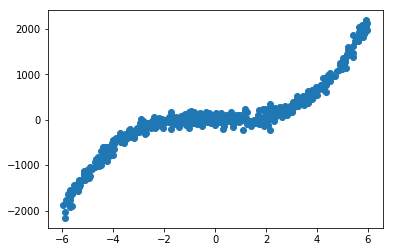

In [3]:
%matplotlib inline
### Start your solution ###
data = gen_data(1, 500, 200)

plt.scatter(data['Xtrain'], data['Ytrain'])
### End your solution ###

In [4]:
### find y given x and w for a polynomial evaluation, i.e., compute sum_{i=0}^{degree} w_i x^i
def find_y(x,w):
    r = []
    degree = len(w)
    for i in range(len(x)):
        temp = 0
        for j in range(degree):
            temp = temp+w[j]*(x[i]**j)
        r = r+[temp]
    return r

In [5]:
Ntrain = len(data['Xtrain'])
Ntest = len(data['Xtest'])
Xtrain = np.asmatrix(data['Xtrain'])
Ytrain = np.asmatrix(data['Ytrain'])
Xtest = np.asmatrix(data['Xtest'])
Ytest = np.asmatrix(data['Ytest'])

for i in range(3):
        if i==0: #Intercept term
            X = [1]*Ntrain
            Xt = [1]*Ntest
        else:
            X = np.vstack([X,np.power(Xtrain,i)])
            Xt = np.vstack([Xt,np.power(Xtest,i)])

In [6]:
### regression: fit, plot, and error on test set
def my_regression(data,D,a,plot=False):
    """
    Fits polynomial regression or ridge regression to dataset, plot the results, and calculates training
    and test errors
    Inputs: data= dictionary, D = degree of polynomial, a = ridge regression parameter
    If a == 0 it means ordinary polynomial regression
    Output: Dictionary training error, test error (square root of MSE) and weights
    """
    Ntrain = len(data['Xtrain'])
    Ntest = len(data['Xtest'])
    Xtrain = np.asmatrix(data['Xtrain'])
    Ytrain = np.asmatrix(data['Ytrain'])
    Xtest = np.asmatrix(data['Xtest'])
    Ytest = np.asmatrix(data['Ytest'])
    

    Ytrain = Ytrain.transpose() #Format in which it is expected for regression later on
    Ytest = Ytest.transpose() #Format in which it is expected for regression later on
    
    # preparing for polynomial
    for i in range(D+1):
        if i==0: #Intercept term
            X = [1]*Ntrain
            Xt = [1]*Ntest
        else:
            X = np.vstack([X,np.power(Xtrain,i)])
            Xt = np.vstack([Xt,np.power(Xtest,i)])
    X = X.transpose()
    Xt = Xt.transpose() #test feature vectors
    
    reg = linear_model.Ridge (alpha = a) 
    #Note that if a = 0, you could have run a simple linear regression (see documentation for sklearn.linear_model.LinearRegression)
    reg.fit(X,Ytrain)
    predictions = reg.predict(Xt)
    Rtest = np.linalg.norm(predictions-Ytest) #test error, note that this is the RMSE
    predictions = reg.predict(X)
    Rtrain = np.linalg.norm(predictions-Ytrain) #training error, note that this is the RMSE
    w = reg.coef_.tolist()[0] # coefficients
    
    if plot:
        # plots
        x = np.linspace(-5,5,1000)
        
        # try to understand find_y()
        
        y = find_y(x,w)
        
        # subplot 2 rows 1 column 1 index
        
        plt.subplot(211)
        plt.scatter(data['Xtrain'], data['Ytrain'])
        plt.plot(x,y)
        plt.title('training samples and regression')
        plt.show()

        x = np.linspace(-5,5,1000)
        
        # try to understand find_y()
        
        y = find_y(x,w)
        
        # subplot 2 rows 1 column 2 index
        
        plt.subplot(212)
        plt.scatter(data['Xtest'], data['Ytest'])
        plt.plot(x,y)
        plt.title('test samples and regression')
        plt.show()
    
    return {'weights':w,'TrainingError':Rtrain/np.sqrt(Ntrain), 'TestError':Rtest/np.sqrt(Ntest)}

In [7]:
data = gen_data(1, 20, 10) # generating training data with noise, noiseless test data. Change samples for train and test.
print(data['Ytest']) #Just to eyeball the values

[    4.43414955    33.19560005 -1685.07917344   256.13620599
  -654.64991137    58.2933278    -12.5422602      8.54416615
 -1327.10442666  -314.0639573 ]


# Step 3

Let's examine the model's aptitude for predicting training data as opposed to test data. Use the `my_regression` function below to visualize the model. Vary the value of the degree D and see what happens visually. Take a look inside that block to make sure you understand what is happening!

C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


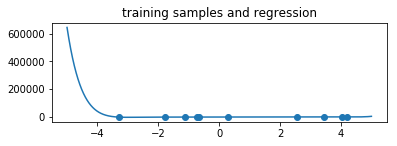

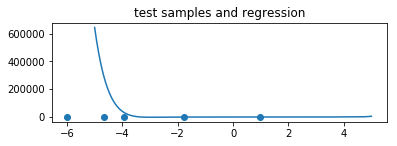

In [8]:
### Start your solution ###
# Make sure to plot=True!
data = gen_data(1, 10, 5)
result = my_regression(data, D=10, a=0, plot=True) #Fitting your training data with a polynomial of degree D. Change D!
### End your solution ###

## Step 4

In the following cell, modify the `regression_with_validation` function to split your training data into 70/30 for training and validation.

We start by providing the code for shuffling two lists in unison.

In [9]:
def regression_with_validation(data, D, a, t=0.7, plot=False):
    """
    Fits polynomial regression or ridge regression to dataset. 
    Inputs: data= dictionary, D = degree of polynomial, alpha = ridge regression parameter,
    t is %age of data to use for training, and the rest for validation.
    If alpha == 0 it means ordinary polynomial regression
    Output: Dictionary training error, test error (square root of MSE) and weights
    """
    all_x = np.array(data['Xtrain'])
    all_y = np.array(data['Ytrain'])
    
    n_total = len(all_x)
    Ntrain = int(t * n_total)
    Nval = n_total - Ntrain
    #The above quantities are arrays that we need to randomly split into t% for training, and (100-t)% for validation.
    #Store your result in the *arrays* arr_train_x, arr_train_y, arr_val_x, and arr_val_y
    
    ### Start your solution ###
    x_shuffled, y_shuffled = utils.shuffle(all_x, all_y) #Shuffles x and y arrays in unison
    arr_train_x = x_shuffled[:Ntrain]
    arr_train_y = y_shuffled[:Ntrain]
    arr_val_x = x_shuffled[Ntrain:]
    arr_val_y = y_shuffled[Ntrain:]
    ### End your solution ###
    
    Xtrain = np.asmatrix(arr_train_x)
    Ytrain = np.asmatrix(arr_train_y)
    
    Xval = np.asmatrix(arr_val_x)
    Yval = np.asmatrix(arr_val_y)
    
    Ntest = len(data['Xtest'])
    Xtest = np.asmatrix(data['Xtest'])
    Ytest = np.asmatrix(data['Ytest'])
    
    
    
    Ytrain = Ytrain.transpose() # The transpose puts a response on each row.
    Ytest = Ytest.transpose()
    Yval = Yval.transpose()
    
    
    # preparing for polynomial
    for i in range(D+1):
        if i==0:
            X = [1] * Ntrain
            Xv = [1] * Nval
            Xt = [1] * Ntest
        else:
            X = np.vstack([X,np.power(Xtrain,i)])
            Xv = np.vstack([Xv,np.power(Xval,i)])
            Xt = np.vstack([Xt,np.power(Xtest,i)])
    X = X.transpose() #transpose puts each data point on a row of the matrix, as desired
    Xv = Xv.transpose()
    Xt = Xt.transpose()
    
    reg = linear_model.Ridge (alpha = a)
    reg.fit(X,Ytrain)
    test_predictions = reg.predict(Xt)
    Rtest = np.linalg.norm(test_predictions-Ytest) #test error, note that this is the RMSE
    train_predictions = reg.predict(X)
    Rtrain = np.linalg.norm(train_predictions-Ytrain) #training error, note that this is the RMSE
    
    val_predictions = reg.predict(Xv)
    Rval = np.linalg.norm(val_predictions-Yval) #validation error, note that this is the RMSE
    w = reg.coef_.tolist()[0] # coefficients
    
    
    # plots
    if plot == True:
        x = np.linspace(-5,5,1000)
        y = find_y(x,w)
        plt.subplot(211)
        plt.scatter(arr_train_x, arr_train_y)
        plt.plot(x,y)
        plt.title('training samples and regression')
        plt.show()

        x = np.linspace(-5,5,1000)
        y = find_y(x,w)
        plt.subplot(212)
        plt.scatter(arr_val_x, arr_val_y)
        plt.plot(x,y)
        plt.title('validation samples and regression')
        plt.show()
    
    return {'weights':w,'TrainingError':Rtrain/np.sqrt(Ntrain), 'ValError':Rval/np.sqrt(Nval), 'TestError':Rtest/np.sqrt(Ntest)}

# Step 5

Let's examine the mode's aptitude for predicting training data as opposed to test data. Use the `regression_with_validation` function to visualize the model.

In [10]:
data = gen_data(1, 60, 15) #Decrease number of samples to see effect.

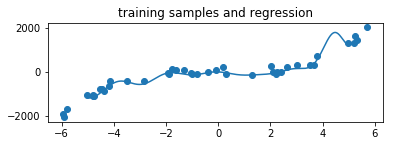

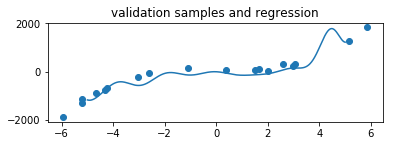

In [11]:
result = regression_with_validation(data, 20, 0, t=0.7, plot=True) #Change the model degree and regularization.

# Step 6

Now, try plotting the training, test, and validation errors (in the same graph) as a function of the polynomial degree.

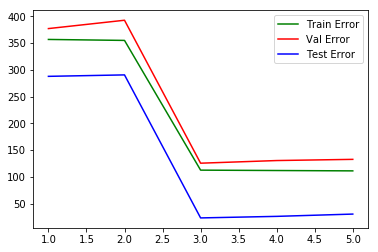

In [25]:
degrees = range(1, 6)

# Array containing all RMSE errors 

val_errors = np.zeros(len(degrees))
train_errors = np.zeros(len(degrees))
test_errors = np.zeros(len(degrees))

reps = 100 #Number of repetitions of this experiment, so you can get a reasonable idea of train/test/val errors
### Start your solution ###
for rep in range(reps):
    for degree in degrees:
        result = regression_with_validation(data, degree, 0, t=0.7, plot=False)
        val_errors[degree-1]+= float(result['ValError']) / reps
        train_errors[degree-1]+= float(result['TrainingError']) / reps
        test_errors[degree-1]+= float(result['TestError']) / reps
### End your solution ###

plt.plot(degrees, train_errors, 'g')
plt.plot(degrees, val_errors, 'r')
plt.plot(degrees, test_errors, 'b')
plt.legend(["Train Error", "Val Error", "Test Error"], loc = "best")

Run this a few times to get an idea of the "generic" behavior. Zoom into the curves to get a better idea.

What would you expect these curves to look like and does the plot match your intuition? Which is the better proxy for test error? Training error or validation error?